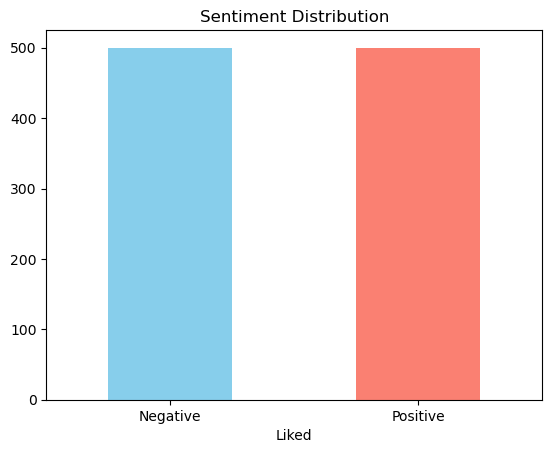

Sentiment Distribution:
Liked
1    500
0    500
Name: count, dtype: int64

Most Common Words in Positive Reviews: [('i', 138), ('a', 130), ('good', 73), ('great', 70), ('place', 60), ('food', 60), ('service', 47), ('very', 47), ('you', 40), ('had', 37)]
Most Common Words in Negative Reviews: [('i', 219), ('a', 143), ('t', 78), ('food', 67), ('we', 53), ('place', 51), ('be', 44), ('my', 40), ('service', 40), ('at', 40)]

Average Length of Positive Reviews: 7.59
Average Length of Negative Reviews: 8.746
Selected Features for Modeling:
['again', 'all', 'also', 'amazing', 'an', 'are', 'at', 'back', 'be', 'been', 'best', 'can', 'don', 'ever', 'food', 'friendly', 'from', 'go', 'good', 'great', 'had', 'have', 'here', 'if', 'just', 'like', 'my', 'never', 'nice', 'no', 'one', 'only', 'our', 'out', 'place', 'really', 'restaurant', 'service', 'their', 'there', 'they', 'time', 'up', 'very', 'we', 'what', 'will', 'would', 'you', 'your', 'Review_Length']


In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Update the file path to match the location of your dataset
file_path = r'C:\Users\cheyanne.gardner\OneDrive\Documents\DeVos\Restaurant_Reviews.tsv'
data = pd.read_csv(file_path, sep='\t')

# Text preprocessing
def preprocess(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text).lower()  # Remove non-letters, lowercase
    return ' '.join(word.rstrip('s') for word in text.split() if word not in {'the', 'is', 'and', 'on', 'in', 'it', 'this', 'of', 'to', 'was', 'for', 'not', 'that', 'with', 'but', 'so', 'were', 'by'})

data['Cleaned_Review'] = data['Review'].apply(preprocess)

# Sentiment distribution
data['Liked'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], title='Sentiment Distribution')
plt.xticks([0, 1], ['Negative', 'Positive'], rotation=0)
plt.show()

# Check sentiment distribution
print("Sentiment Distribution:")
print(data['Liked'].value_counts())

# Word frequency in positive and negative reviews
from collections import Counter

positive_words = ' '.join(data[data['Liked'] == 1]['Cleaned_Review']).split()
negative_words = ' '.join(data[data['Liked'] == 0]['Cleaned_Review']).split()

positive_freq = Counter(positive_words).most_common(10)
negative_freq = Counter(negative_words).most_common(10)

print("\nMost Common Words in Positive Reviews:", positive_freq)
print("Most Common Words in Negative Reviews:", negative_freq)

# Average length of reviews
data['Review_Length'] = data['Cleaned_Review'].apply(lambda x: len(x.split()))
avg_positive_length = data[data['Liked'] == 1]['Review_Length'].mean()
avg_negative_length = data[data['Liked'] == 0]['Review_Length'].mean()

print(f"\nAverage Length of Positive Reviews: {avg_positive_length}")
print(f"Average Length of Negative Reviews: {avg_negative_length}")

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

# Use TF-IDF for vectorization
tfidf = TfidfVectorizer(max_features=50)  
X_tfidf = tfidf.fit_transform(data['Cleaned_Review'])

# Create additional features
data['Review_Length'] = data['Cleaned_Review'].apply(lambda x: len(x.split()))

# Convert TF-IDF to DataFrame for feature integration
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Combine vectorized features with additional ones
X = pd.concat([tfidf_df, data['Review_Length']], axis=1)
y = data['Liked']  # Target variable

# Display feature names
print("Selected Features for Modeling:")
print(list(X.columns))